In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/churn_train.csv')

In [26]:
df[df['phone'] == np.nan]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct


In [29]:
df['city'].unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

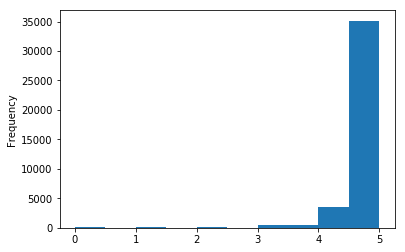

In [14]:
df['avg_rating_by_driver'].fillna(0).plot.hist()

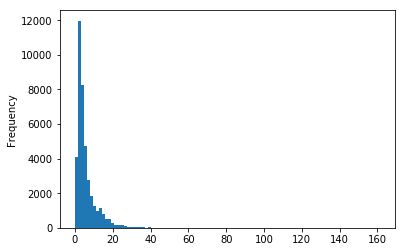

In [18]:
df['avg_dist'].plot.hist(bins = 100)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
to drop = ['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct'
          ]

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct']

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def clean(df, drop_list):
    df_ = df.drop(drop_list, axis=1)
    cities = list(df_['city'].unique())
    for index, i in enumerate(cities):
        df_['city'].where(df_['city'] != i, index + 1, inplace=True)
    phones = df_['phone'].unique()
    for index, i in enumerate(phones):
        df_['phone'].where(df_['phone'] != i, index + 1, inplace=True)
    df_['signup_date'] = pd.to_datetime(df_['signup_date'], infer_datetime_format=True)
    df_['last_trip_date'] = pd.to_datetime(df_['last_trip_date'], infer_datetime_format=True)
    date = pd.to_datetime('20140601', infer_datetime_format=True)
    df_['churn'] = df_['last_trip_date'] >= date
    df_ = df_.drop(['signup_date','last_trip_date'], axis=1)
    df_ = df_.fillna(0)
    return df_

def confusionMatrix(estimator, y_test, y_pred):
    acc = np.mean(y_test == y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    matrix = np.array([[tp,fp],[fn, tn]])
    pres = tp / (tp + fp)
    recall = tp / (tp + fn)
    return acc, matrix, pres, recall

confusion Matrix:  [[1987  705]
 [ 985 4323]]
acc:  0.78875
pres:  0.7381129271916791
recall:  0.6685733512786003
auc:  0.7641792770712812


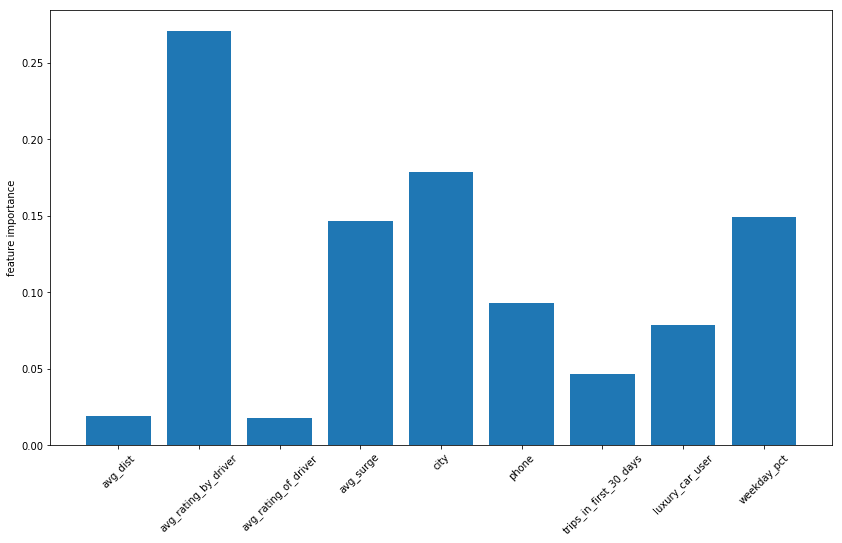

In [72]:
#importing the data
df_train_imp = pd.read_csv('data/churn_train.csv')
df_test_imp = pd.read_csv('data/churn_test.csv')

#cleaning the data
drop = ['surge_pct']
df_train = clean(df_train_imp, drop)
df_test = clean(df_test_imp, drop)

#spliting X and y for training and test
y_train = df_train['churn'].values
X_train = df_train.drop(['churn'], axis=1).values
y_test = df_test['churn'].values
X_test = df_test.drop(['churn'], axis=1).values
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=.2, random_state=42)

# rf = GradientBoostingClassifier(n_estimators=100,random_state=j,max_features=i)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# acc.append(np.mean(y_test == y_pred))
# plt.plot(num_tree, acc)
# plt.xlabel('features')
# plt.ylabel('accuracy')
# plt.show()

Active:  0.3365
Inactive:  0.6635


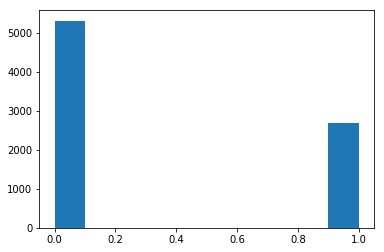

In [63]:
fig, ax = plt.subplots()
ax.hist(y_pred.astype(int));
print('Active: ', sum(y_pred == 1)/(len(y_pred)))
print('Inactive: ', sum(y_pred == 0)/(len(y_pred)))

confusion Matrix:  [[1987  705]
 [ 985 4323]]
acc:  0.789
pres:  0.738
recall:  0.669
auc:  0.764


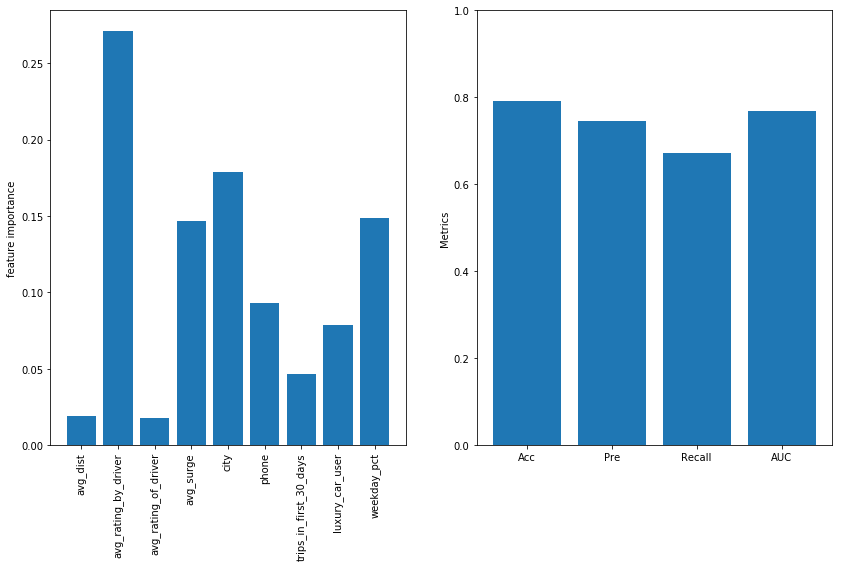

In [115]:
# Build Gradient Boosting Alg
rf = GradientBoostingClassifier(n_estimators=100, random_state=1, learning_rate = 0.1)
rf.fit(X_train_s, y_train_s)
y_pred = rf.predict(X_test_s)

#confusionMatrix
acc, matrix, pres, recall = confusionMatrix(rf, y_test_s, y_pred)
auc = roc_auc_score(y_test_s, y_pred)
print('confusion Matrix: ', matrix)
print('acc: ', round(acc, 3))
print('pres: ', round(pres, 3))
print('recall: ', round(recall, 3))
print('auc: ', round(auc, 3))
mets1 = {'Acc':[acc], 'Pre':[pres], 'Recall':[recall], 'AUC':[auc]}
metrics1 = pd.DataFrame.from_dict(mets)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 8))
ax1.bar(df_train.drop("churn", axis=1).columns, rf.feature_importances_)
ax1.set_ylabel('feature importance')
plt.setp(ax1.get_xticklabels(), rotation=45);
ax2.bar(list(metrics.columns), metrics.values[0])
ax2.set_ylabel('Metrics')
ax2.set_ybound(0, 1)
ax1.set_xticklabels(labels = df_train.drop("churn", axis=1).columns, rotation=90)
fig.savefig('model1.png', bbox_inches = "tight")

220     0.2
confusion Matrix:  [[1995  684]
 [ 977 4344]]
acc:  0.792
pres:  0.745
recall:  0.671
auc:  0.768


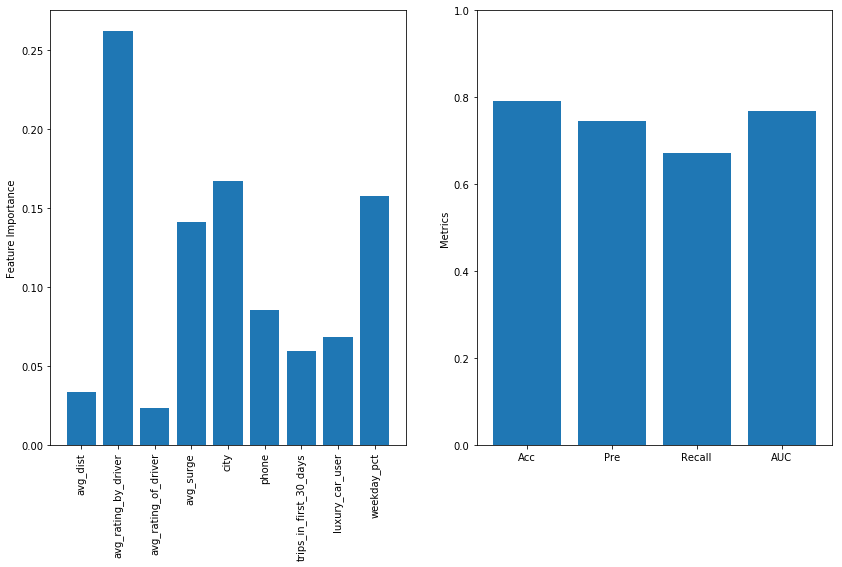

In [114]:
nest = 220
lr = 0.2
# Build Gradient Boosting Alg
rf = GradientBoostingClassifier(n_estimators=nest, random_state=1, learning_rate = lr)
rf.fit(X_train_s, y_train_s)
y_pred = rf.predict(X_test_s)
print(nest, '   ', lr)
#confusionMatrix
acc, matrix, pres, recall = confusionMatrix(rf, y_test_s, y_pred)
auc = roc_auc_score(y_test_s, y_pred)
mets = {'Acc':[acc], 'Pre':[pres], 'Recall':[recall], 'AUC':[auc]}
metrics = pd.DataFrame.from_dict(mets)
print('confusion Matrix: ', matrix)
print('acc: ', round(acc, 3))
print('pres: ', round(pres, 3))
print('recall: ', round(recall, 3))
print('auc: ', round(auc, 3))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 8))
ax1.bar(df_train.drop("churn", axis=1).columns, rf.feature_importances_)
ax1.set_ylabel('Feature Importance')
ax2.bar(list(metrics.columns), metrics.values[0])
ax2.set_ylabel('Metrics')
ax2.set_ybound(0, 1)
ax1.set_xticklabels(labels = df_train.drop("churn", axis=1).columns, rotation=90)
fig.savefig('model2.png', bbox_inches = "tight")

In [134]:
for i in range(4):
    print(list(mets.values())[i][0] - list(mets1.values())[i][0])

0.0036250000000001004
0.0065679238721506605
0.0026917900403767847
0.0034342005094483152


In [124]:
mets1.values()

dict_values([[0.78875], [0.7381129271916791], [0.6685733512786003], [0.7641792770712812]])

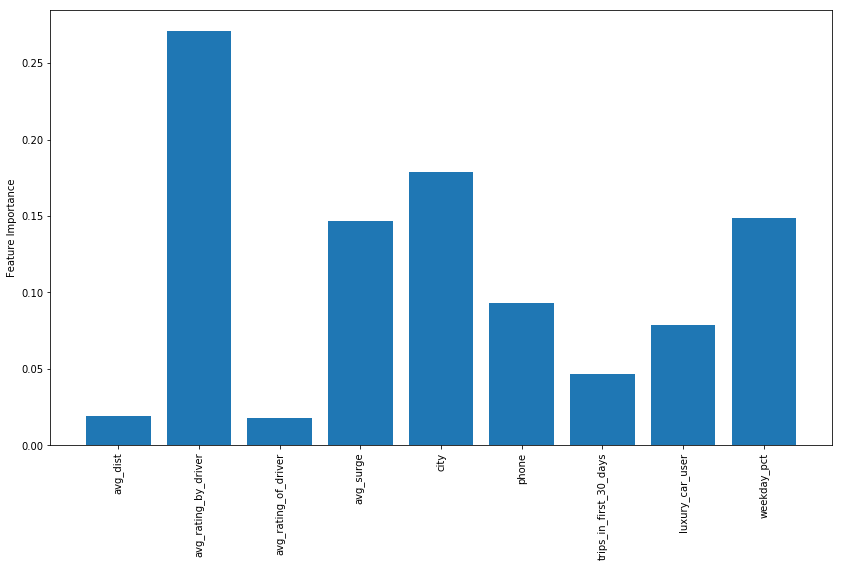

In [135]:
fig, ax1 = plt.subplots(figsize = (14, 8))
ax1.bar(df_train.drop("churn", axis=1).columns, rf.feature_importances_)
ax1.set_ylabel('Feature Importance')
plt.setp(ax1.get_xticklabels(), rotation=45);
ax1.set_xticklabels(labels = df_train.drop("churn", axis=1).columns, rotation=90)
fig.savefig('modelFeature.png', bbox_inches = "tight")